In [1]:
# O'Reilly Bayes 
# Chapter  - Estimating Counts

In [2]:
# This chapter is all about estimating the size of a population.

# The Train Problem
# From Frederick Mosteller's Fifty Challenging Problems in Probability with Solutions

# A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60.
# Estimate how many locomotives the railroad has.

# Based on this observation, we know 60 or more locomotives. But how many more? Using Bayesian reasoning

# What did we know before we saw the data? (prior)
# For any given value of N, what is the likelihood  of seeing the data ( a locomotive with number 60)?

# Assumption: N is equally likely to be any value from 1 to 1000

#prior distro

In [3]:
import numpy as np
from empiricaldist import Pmf

In [4]:
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

In [5]:
def update_train(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [6]:
data = 60
posterior = prior.copy()
update_train(posterior, data)

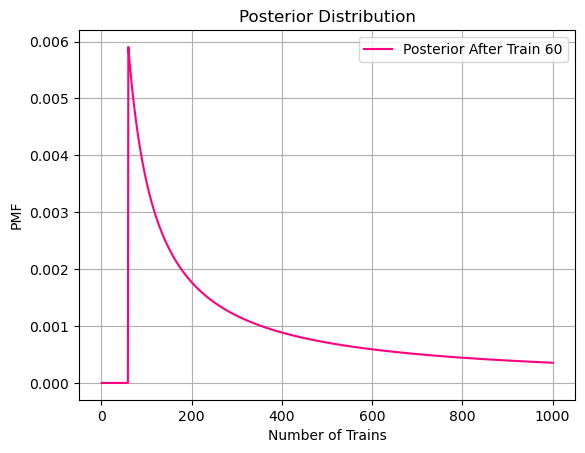

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(posterior, color = "#FF007F", label='Posterior After Train 60')

ax.set(xlabel='Number of Trains', ylabel='PMF',
       title='Posterior Distribution')

ax.legend()

ax.grid()
plt.show()

In [8]:
# So all values of seeing a train numbered than higher than 60 is 
# less than seeing 60, as the denominator increases.

# But trying something else, let's compute the mean of the posterior distribution.

np.sum(posterior.ps * posterior.qs)


333.41989326370776

In [9]:
posterior.mean()

333.41989326370776

In [10]:
# Thus, 333 might be a good guess to minimize error.

# Sensitivity to Error

# With only one observation, the the posterior is highly sensitive to the prior

# below we show what happens as we vary the upper bounds

# Fancy like Reba , I am. 
# They didn't reveal much of who I was in my first... frankly, they just didn't care about me at all.  
# supported but isolated in the most horrible ways.  

In [11]:
# For an upper bound of 500
hypos2 = np.arange(1, 500)
prior2 = Pmf(1, hypos2)
#data = 60
posterior2 = prior2.copy()
update_train(posterior2, data)
np.sum(posterior2.ps * posterior2.qs)
posterior2.mean()

206.80387729525884

In [12]:
hypos3 = np.arange(1, 2000)
prior3 = Pmf(1, hypos2)
#data = 60
posterior3 = prior3.copy()
update_train(posterior3, data)
np.sum(posterior3.ps * posterior3.qs)
posterior3.mean()

206.80387729525884

In [13]:
# With more observations the posteriors based on the priors tend to converge
# with three observations (30, 60, 90), we get much more similiatr posterior means

In [14]:
# UPDATED 3 times to get the posteriors after 3 observations

hypos4 = np.arange(1, 500)
prior4 = Pmf(1, hypos4)
data = [30] # Instead of running it all at once, I can run the update 3 times 
# like updating dice on page 39
posterior4 = prior4.copy()
update_train(posterior4, data)
data = [60]
update_train(posterior4, data)
data = [90]
update_train(posterior4, data)
np.sum(posterior4.ps * posterior4.qs)
posterior4.mean()

151.80348606277948

In [15]:
hypos5 = np.arange(1, 1000)
prior5 = Pmf(1, hypos5)
data = [30] # Instead of running it all at once, I can run the update 3 times 
# like updating dice on page 39
posterior5 = prior5.copy()
update_train(posterior5, data)
data = [60]
update_train(posterior5, data)
data = [90]
update_train(posterior5, data)
np.sum(posterior5.ps * posterior5.qs)
posterior5.mean()

164.29208953758175

In [16]:
hypos6 = np.arange(1, 2000)
prior6 = Pmf(1, hypos6)
data = [30] # Instead of running it all at once, I can run the update 3 times 
# like updating dice on page 39
posterior6 = prior6.copy()
update_train(posterior6, data)
data = [60]
update_train(posterior6, data)
data = [90]
update_train(posterior6, data)
np.sum(posterior6.ps * posterior6.qs)
posterior6.mean()

171.3345116153794

In [17]:
# Power Law Prior

# This distribution of company sizes tends to follow a power law, as Robert Axtell reports in Science
# mathematically, a power law means that the number of companies with a given size N, is proportional to (1/N)^symbol,
# where sypos is a parameter that is often near one.

In [18]:
# In python, Power Law Prior
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()

7.485470860550345

In [19]:
# Uniform Prior
hypos = np.arange(1,1001)
uniform = Pmf(1, hypos, name='uniform')
uniform.normalize()

1000

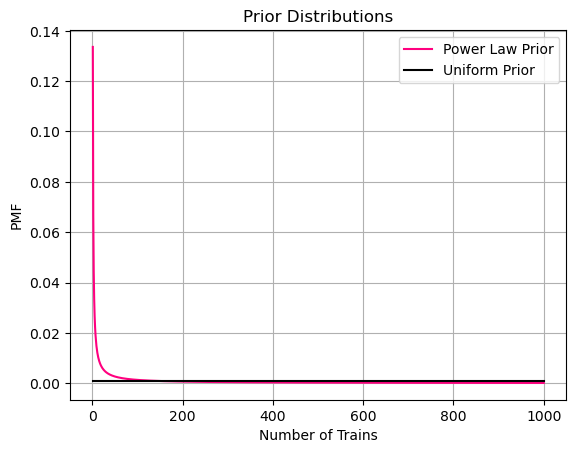

In [20]:
fig, ax = plt.subplots()
ax.plot(power, color = "#FF007F", label='Power Law Prior')
ax.plot(uniform, color = "black", label='Uniform Prior')
ax.set(xlabel='Number of Trains', ylabel='PMF',
       title='Prior Distributions')

ax.legend()

ax.grid()
plt.show()

In [21]:
# update for both priors
dataset = [60]
update_train(uniform, dataset)
update_train(power, dataset)

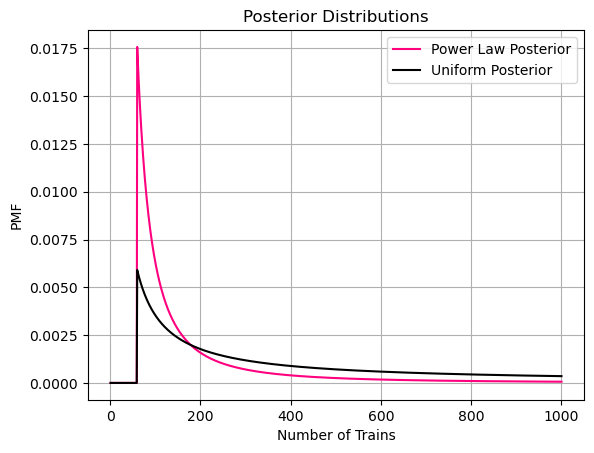

In [22]:
fig, ax = plt.subplots()
ax.plot(power, color = "#FF007F", label='Power Law Posterior')
ax.plot(uniform, color = "black", label='Uniform Posterior')
ax.set(xlabel='Number of Trains', ylabel='PMF',
       title='Posterior Distributions')

ax.legend()

ax.grid()
plt.show()

In [23]:
# Posterior mean using power law priors for three observations

In [24]:
# Posterior mean using power law prior with a hypothesis of company with 1000 trains
dataset = [30]
update_train(uniform, dataset)
update_train(power, dataset)
dataset = [90]
update_train(uniform, dataset)
update_train(power, dataset)

In [25]:
np.sum(power.ps * power.qs)
power.mean()

133.2752313750311

In [26]:
# Posteriof mean using power law prior with a hypothesis of a company with 2000 trains
hypos = np.arange(1, 2001)
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()
dataset = [60]
update_train(power, dataset)
dataset = [30]
update_train(power, dataset)
dataset = [90]
update_train(power, dataset)

In [27]:
np.sum(power.ps * power.qs)
power.mean()

133.99746308073125

In [28]:
# Posterior mean using a power law prior with a hypothesis of a company with 500 trains
hypos = np.arange(1, 501)
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()
dataset = [60]
update_train(power, dataset)
dataset = [30]
update_train(power, dataset)
dataset = [90]
update_train(power, dataset)
np.sum(power.ps * power.qs)
power.mean()

130.7084698625599

In [29]:
# Credible Intervals

# If we are given a value x, we can compute ist percentile rank by finding all values less than or 
# equal to x and adding up their probabilities.

# Pmf provides a method that does this computation
# probability that a company has less than 100 trains
power.prob_le(100) 

0.29540992173919445

In [30]:
# I am not teaching, I am learning.  you have had me unemployed for YEARSSSS thinking I was a dog for 
# a lady that couldn't read in any language.  Happy to learn together.
# I had a year of isolation before the sim, and then first which was mostly isolated in nothingness,
# now this. Yes I like to use my Jupyter notebooks as my cathartic diary too. 

In [31]:
def quantile(pmf, prob):
    """Compute a quantile with the given prob."""
    total = 0
    for q, p in pmf.items():
        total += p
        if total >= prob:
            return q
    return np.nan # why are we returning a null here. In the event that total is never >= prob?

In [32]:
# Computing the 50th percentile of the posterior
quantile (power, 0.5)

113

In [33]:
# the result is the median of the posterior
# Pmf provides a method called quantile that does the same thing.  We can call it like this to compute 
# 5th and 95th percentiles

In [34]:
power.quantile([0.05, 0.95])

array([ 91., 235.])

In [35]:
# Thefore the probability is 90% that the number of trains is between 91 and 242. This is called a 90% credible
# interval.

power.credible_interval(0.9)

array([ 91., 235.])

In [36]:
# The German Tank Problem

# During WWII the Economic Warfare Division of the American Embassy used statistical analysis to estimate German
# Production of tanks and other equipment.
# Western allies had captured log books, inventories, and repair records that included chassis and engine serial
# numbers for individual tanks.

# Analysis of these records indicated that serial numbers were allocated by manufacturer and tank type in blocks
# of 100 numbers, that number in each block were used sequentially, and that not all numbers in each block were used.
# So the problem of estimating German tank production could be reduced, within each block of 100 numbers, to a
# form of the train problem.

# Based on this insight, American and British Analysts producted estimates susbstantially lower than estimates
# from other forms of intelligence. And after the war, records indicated the analysts were substantially 
# more accurate.

# See Wiki and Ruggles and Brodie "An Empirical Approach to Econ. Intel. in WWII" Journal of the
# the American Statistical Association, March 1947, available in the CIA's online reading room.
# https://www.cia.gov/readingroom/docs/CIA-RDP79R01001A001300010013-3.pdf


In [37]:
# Informative Priors

# Among Bayesians, there are two approaches to chosing prior distributions. Some recommend choosing the prior that bets 
# represents background information about the problems; in that case the prior is said to be informative. The problem 
# with using and informatatie prior is that people might have different informations of interpret it differently.  
# So informative priors might seem arbitrary. The alternatibve is a so-called uninformative prior, which is intended to 
# be as unresitricted as possible, to let the data speak for itself. In come cases you can identify a unique prior that 
# has some desiriable property, like representing minimal prior information about the estimated quantity.

# Uninformative priors are appealing because theys seem more objective. But I am generally in favor of using informative
# priors. Why? Bayesian Analysis is always based on modeling decisions. Choosing the prior is one of those 
# decisions, but it is not the only one, and it might not even be the most subjective. So even if an uninformative prior
# is more objective, the entire analysis is still subjective.

# Also, for most practical problems, you are liekly to be in one of two situations: either you have a lot of data or not 
# very much.  If you have a lot of data the choice of the prior doesn't matter; informative and uninformative priors yield 
# almost the same results.  If you don't have muc data, using relevant background information (like the power law 
# distribution) makes a big difference.

# And if as in the German Tank problem, you have to make life or death decisions based on your results, you should probably
# use all of the information at your disposal, rather than maintaining the illusion of objectivity by pretending to know
# less than you do.

# I just finished first.  You didn't love me there, so I was pushed up to people who were a little more discerning.
# I don't smoke, I don't drink, I don't party.  I am closer to the cereal bars of Saudi Arabia and can learn more from
# them. I do need guidance and to be shown though. Rewashing but never given a place for growth is sick, that is what is sick
# I just got through with helping someone through their addiction, with getting someone disabled their ticket to work, etc.
# getting their finances in order, etc.

In [38]:
# Exercise 5-1
# Suppose you are giving  a talk in a large lecture hall and the fire marshall interrupts because they think the audience 
# exceeds 1,200 people, which is the safe capacity of the room. 

# You think there are fewer than 1,200 people, which is the safe capacity of the room.
# You think there are fewer than 1,200 people, and you offer to prove it.  It would take too long to count, so you try an
# experiment:

# You ask how many people were born on May 11, and two people raise their hands
# You ask how many were born on May 23rd, and one person raises their hand
# Finally, you ask how many were born on August 1st, and no one raises their hand.

# How many people are in the audience? What is the probability that there are more than 1,200 people? 
# Hint: Remember the binomial distribution (n choose k) 

# Uninformed prior would be there is (1/365) chance of being born on any given day, all equally likely.
# 

In [39]:
from scipy.stats import binom
import numpy as np


In [40]:
# Assumption: no leap-year birthdays
# Binomail Distribution
# With coins, n is the number of flips, p is the prob of heads (or tails), k = occurences 
# From the binomial distribution, we can treat a person like a coin that may have a birthday on any one
# of 365 days
# With people, n is the number of people we ask in a population (as if we asked each person in our
# hypothetical population)
# probability of asking about a particular date and guessing a person birthday is p = 1/365
# k is the probability of getting a number of birthdays over the n asks 

In [41]:
n = 1200
p = 1/365
k = 2

binom.pmf(k, n, p)

0.20183231301316393

In [42]:
# In a hypothetical population of 1200, the chance of having two people have that same birthday you 
# selected is about 20%.

In [43]:
n = 1200
p = 1/365
k = 3

binom.pmf(k, n, p)

0.22142409431297627

In [44]:
# In a hypothetical population of 1200, the chance of having three people have that same birthday you 
# selected is about 23%.

In [45]:
n = 1200
p = 1/365
k = 0

binom.pmf(k, n, p)

0.037172607930209225

In [46]:
# In a hypothetical population of 1200, the chance of having two people have that same birthday you 
# selected is about 3%.

In [47]:
n = 1200
p = 1/365
ks = [2,3,0]
ps = binom.pmf(ks, n, p)
ps

array([0.20183231, 0.22142409, 0.03717261])

In [48]:
n = np.arange(3,1303,1)
ks = [2]
ps = binom.pmf(ks, n, p)
ps

array([2.24566022e-05, 4.47901544e-05, 7.44457361e-05, ...,
       1.80050649e-01, 1.79833814e-01, 1.79617028e-01])

In [53]:
# Assumptions: no leap year babies (365 days a year) and starting min. population at 2 to avoid getting
# more responses than there are people
n = np.arange(3, 1303, 1)
p = 1/365
ks2 = [3]
ps2 = binom.pmf(ks2, n, p)
ps2

array([2.05646540e-08, 8.20332499e-08, 2.04521253e-07, ...,
       2.14016247e-01, 2.13923191e-01, 2.13829795e-01])

In [54]:
n = np.arange(3, 1303, 1)
p = 1/365
ks3 = [0]
ps3 = binom.pmf(ks3, n, p)
ps3

array([0.99180332, 0.98908605, 0.98637623, ..., 0.02825368, 0.02817627,
       0.02809907])

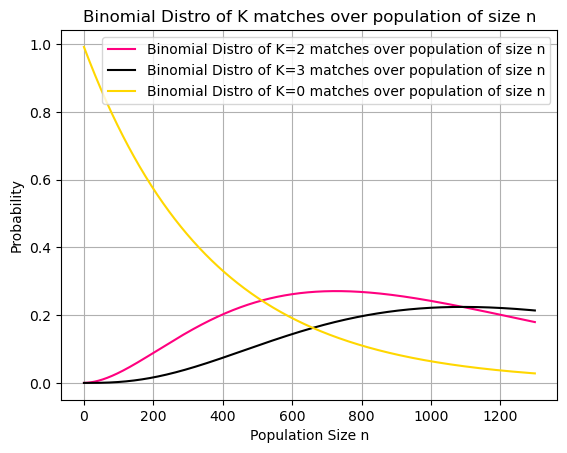

In [55]:
fig, ax = plt.subplots()
ax.plot(ps, color = "#FF007F", 
        label='Binomial Distro of K=2 matches over population of size n')
ax.plot(ps2, color = "black", 
        label='Binomial Distro of K=3 matches over population of size n')
ax.plot(ps3, color = "gold", 
        label='Binomial Distro of K=0 matches over population of size n') #zero is a bit of a problem
ax.set(xlabel='Population Size n', ylabel='Probability',
       title='Binomial Distro of K matches over population of size n')

ax.legend()

ax.grid()
plt.show()

In [75]:
print(ps.max())
print(ps2.max())
print(ps3.max()) # It is meaningless to assume a population of zero.
# assuming a population of at least 3, to avoid the nonsense situation of getting 
# more responses than people (the dead don't get to vote in my world)
# I am not a dog.  I am a human student, completely unloved by anyone except other people's dogs.  
# I love so hard that I get love from people's dogs but I need someone to open the human path (realizing
# that I am human, fairly capable, and not crazy just isolated and lonely and fearful that a path will
# never open)

0.0010726787233177385
0.0012844616001338762
0.0028193839872185677


In [57]:
xmax = n[np.argmax(ps)]
print(xmax)
xmax2 = n[np.argmax(ps2)]
print(xmax2)
xmax3 = n[np.argmax(ps3)] # The most likely population of no positive responses, is just the min population
print(xmax3)
# Thus, the most likely population size for this 2 observations is 729 persons
# The most likely population size for 3 observations is 1094
# The most likely way to get 0 observations is to ask the minimum population

# Considering 

729
1094
3


In [58]:
# Since I know that the minimum population is not likely, I want to look at the mean distribution as
# on page 59, and need to normalize

In [59]:
ps = Pmf(ps)
ps2 = Pmf(ps2)
ps3 = Pmf(ps3)
ps.normalize()
ps2.normalize()
ps3.normalize()

351.78014919057637

In [60]:
np.sum(ps.ps*ps.qs)

753.847569723331

In [61]:
np.sum(ps2.ps*ps2.qs)

875.3553518477156

In [62]:
np.sum(ps3.ps*ps3.qs)

326.2022980647855

In [63]:
# So the population 
#  k=0, prob_max = 3 (min population considered)
#  k=2, prob_max = 729
#  k=3, prob_max = 1094

# The distributions means for each k are as follows:
#  k=0, prob_mean = 326
#  k=2, prob_mean = 755
#  k=3, prob_mean = 875

# This helps illustrate why the max probability is not the best choice, as while a population of 1 has
# the highest chance of 0 observations, it is certainly not likely since the fire marshal thinks there
# are more than 1200 people

# So now we know what are the most probable population counts are... time to look at credible intervals

In [64]:
# probability less than or equal to 1200 is
ps.prob_le(1200)

0.9254457997393291

In [70]:
#The probability that there greater than 1200 is
print(1 - (ps.prob_le(1200)))
#7.5% probability there are more 1200 people with 2 matches
print(1 - (ps2.prob_le(1200)))
#12% probability there are more than 1200 people with 3 matches
print(1 - (ps3.prob_le(1200)))
#less than 1% probability there are more than 1200 people with 0 matches

0.07455420026067094
0.12346540684108387
0.009073448089635838


In [74]:
# Good but better if looking all of the data at once to get an overall probability after the 3 asks

pmf_update = ps * ps2 # after the 2nd ask
pmf_update.normalize()
print((1 - (pmf_update.prob_le(1200))))

pmf_update *= ps3 # after the 3rd ask
pmf_update.normalize()

print((1 - (pmf_update.prob_le(1200))))

0.10025837450327946
0.02778519656406231


In [ ]:
# If calculated correctly, there is less than a 3% probability that there are more than 1200 people.